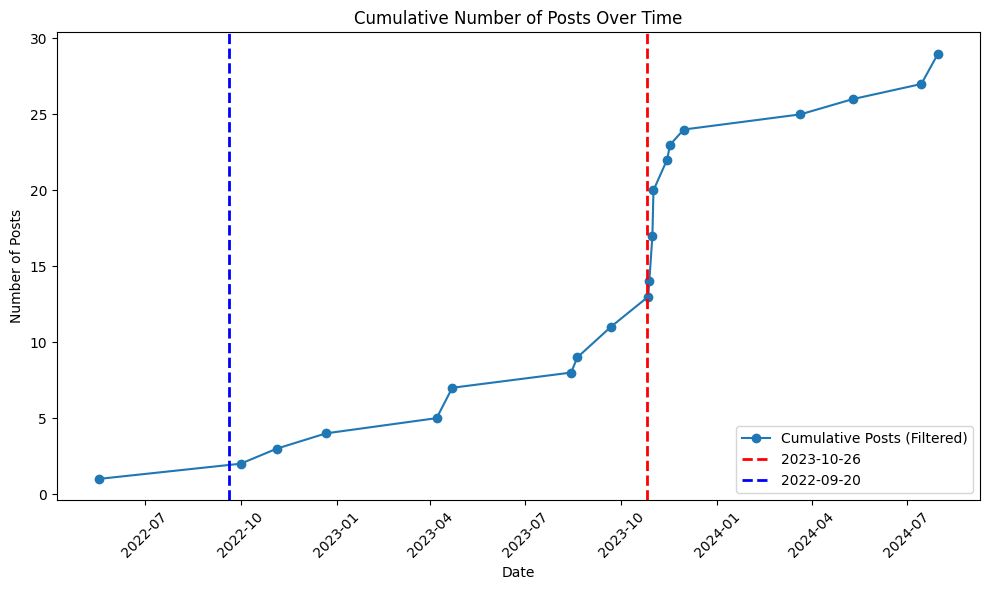

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 읽기
df = pd.read_csv('filtered_bobaedream_data.csv')

# 날짜 형식을 datetime으로 변환
df['Date'] = pd.to_datetime(df['Date'], format='mixed')

# 필터링된 데이터셋
df_filtered = df[df['Date'] >= '2022-05-01']
df_filtered_counts = df_filtered['Date'].value_counts().sort_index()
filtered_cumulative_counts = df_filtered_counts.cumsum()

# 선그래프 그리기
plt.figure(figsize=(10, 6))

# 필터링된 누적합 플롯
plt.plot(filtered_cumulative_counts.index, filtered_cumulative_counts.values, marker='o', label='Cumulative Posts (Filtered)')

# 2023년 10월 26일에 세로선 추가
plt.axvline(pd.Timestamp('2023-10-26'), color='red', linestyle='--', linewidth=2, label='2023-10-26')

# 2022년 9월 20일에 세로선 추가
plt.axvline(pd.Timestamp('2022-09-20'), color='blue', linestyle='--', linewidth=2, label='2022-09-20')

# 그래프 제목 및 축 레이블 설정
plt.title('Cumulative Number of Posts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')

# 범례 추가
plt.legend()

# x축 눈금 설정 (회전)
plt.xticks(rotation=45)

# 그래프 표시
plt.tight_layout()
plt.show()

Date
2023-08-20   -2.291123
2023-11-14    1.319132
2023-11-17    1.770414
Name: Negative_Words, dtype: float64


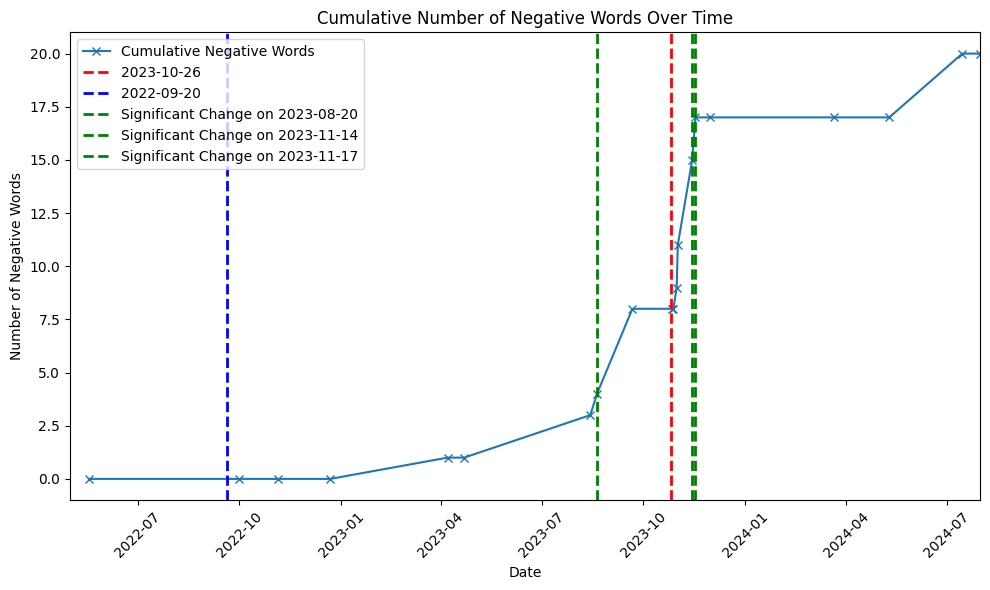

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# CSV 파일 읽기
df = pd.read_csv('filtered_bobaedream_data.csv')

# 날짜 형식을 datetime으로 변환
df['Date'] = pd.to_datetime(df['Date'], format='mixed')

# 결측값을 빈 문자열로 대체
df['Title'] = df['Title'].fillna('')
df['Body'] = df['Body'].fillna('')
df['Comment'] = df['Comment'].fillna('')

# 필터링된 데이터셋
df_filtered = df[df['Date'] >= '2022-05-01']

with open('negative_words.txt', 'r', encoding='utf-8') as file:
    negative_words = [line.strip() for line in file]

# 간단한 토크나이저 함수
def simple_tokenizer(text):
    return text.split()

# 감성 분석을 위한 함수 정의
def count_negative_words(text):
    words = simple_tokenizer(text)
    return sum(1 for word in words if word in negative_words)

# 각 컬럼의 부정적인 단어 수 계산
df_filtered['Negative_Words'] = df_filtered['Title'].apply(count_negative_words) + \
                                df_filtered['Body'].apply(count_negative_words) + \
                                df_filtered['Comment'].apply(count_negative_words)

# 부정적인 단어 수 누적 합 계산
negative_word_counts = df_filtered.groupby('Date')['Negative_Words'].sum().sort_index()
cumulative_negative_words = negative_word_counts.cumsum()

# 필터링된 데이터셋의 게시물 수 누적 합 계산
df_filtered_counts = df_filtered['Date'].value_counts().sort_index()
filtered_cumulative_counts = df_filtered_counts.cumsum()

# 이동 평균 계산 (여기서는 7일 이동 평균 사용)
moving_avg = cumulative_negative_words.rolling(window=7).mean()

# 기울기 계산
gradient = moving_avg.diff()

# z-score 계산 함수
def z_score(series):
    return (series - series.mean()) / series.std()

# 기울기의 z-score 계산
z_scores = z_score(gradient)

# z-score가 특정 임계값을 넘는 지점을 감지
threshold = 1.1  # 임계값 설정
significant_changes = z_scores[z_scores.abs() > threshold]

# 결과 출력
print(significant_changes)

# 그래프 시각화
plt.figure(figsize=(10, 6))
plt.plot(cumulative_negative_words.index, cumulative_negative_words.values, marker='x', label='Cumulative Negative Words')
plt.axvline(pd.Timestamp('2023-10-26'), color='red', linestyle='--', linewidth=2, label='2023-10-26')
plt.axvline(pd.Timestamp('2022-09-20'), color='blue', linestyle='--', linewidth=2, label='2022-09-20')

# 감지된 변화 지점에 세로선 추가
for date in significant_changes.index:
    plt.axvline(date, color='green', linestyle='--', linewidth=2, label=f'Significant Change on {date.date()}')

plt.title('Cumulative Number of Negative Words Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Negative Words')
plt.legend()
plt.xticks(rotation=45)
plt.xlim(pd.Timestamp('2022-05-01'), cumulative_negative_words.index.max())
plt.tight_layout()
plt.show()


Date
2023-09-21    1.405068
2023-11-14    1.405068
2023-11-17    1.773610
Name: Negative_Words, dtype: float64


/var/folders/32/fgxbm83x3515n1j6v0sd3pfw0000gn/T/ipykernel_65571/86583263.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Negative_Words'] = df_filtered['Title'].apply(count_negative_words) + \


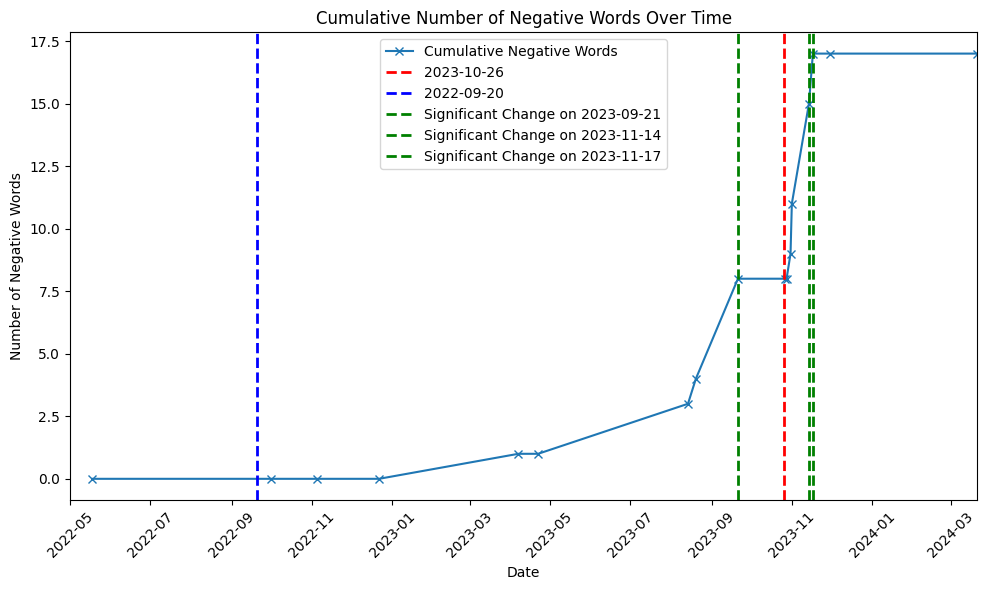

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# CSV 파일 읽기
df = pd.read_csv('filtered_bobaedream_data.csv')

# 날짜 형식을 datetime으로 변환
df['Date'] = pd.to_datetime(df['Date'], format='mixed')

# 결측값을 빈 문자열로 대체
df['Title'] = df['Title'].fillna('')
df['Body'] = df['Body'].fillna('')
df['Comment'] = df['Comment'].fillna('')

# 필터링된 데이터셋
df_filtered = df[df['Date'] >= '2022-05-01']
df_filtered = df[df['Date'] <= '2024-04-01']

# 부정적인 단어 리스트 파일 읽기
with open('negative_words.txt', 'r', encoding='utf-8') as file:
    negative_words = [line.strip() for line in file]

# 간단한 토크나이저 함수
def simple_tokenizer(text):
    return text.split()

# 감성 분석을 위한 함수 정의
def count_negative_words(text):
    words = simple_tokenizer(text)
    return sum(1 for word in words if word in negative_words)

# 각 컬럼의 부정적인 단어 수 계산
df_filtered['Negative_Words'] = df_filtered['Title'].apply(count_negative_words) + \
                                df_filtered['Body'].apply(count_negative_words) + \
                                df_filtered['Comment'].apply(count_negative_words)

# 부정적인 단어 수 누적 합 계산
negative_word_counts = df_filtered.groupby('Date')['Negative_Words'].sum().sort_index()
cumulative_negative_words = negative_word_counts.cumsum()

# 필터링된 데이터셋의 게시물 수 누적 합 계산
df_filtered_counts = df_filtered['Date'].value_counts().sort_index()
filtered_cumulative_counts = df_filtered_counts.cumsum()

# 이전 10일 동안의 이동 평균 계산 (미래 값을 포함하지 않음)
moving_avg = cumulative_negative_words.rolling(window=3, min_periods=1).mean()

# 기울기 계산
gradient = moving_avg.diff()

# z-score 계산 함수
def z_score(series):
    return (series - series.mean()) / series.std()

# 기울기의 z-score 계산
z_scores = z_score(gradient)

# z-score가 특정 임계값을 넘는 지점을 감지
threshold = 1.3  # 임계값 설정
significant_changes = z_scores[z_scores.abs() > threshold]

# 결과 출력
print(significant_changes)

# 그래프 시각화
plt.figure(figsize=(10, 6))
plt.plot(cumulative_negative_words.index, cumulative_negative_words.values, marker='x', label='Cumulative Negative Words')
plt.axvline(pd.Timestamp('2023-10-26'), color='red', linestyle='--', linewidth=2, label='2023-10-26')
plt.axvline(pd.Timestamp('2022-09-20'), color='blue', linestyle='--', linewidth=2, label='2022-09-20')

# 감지된 변화 지점에 세로선 추가
for date in significant_changes.index:
    plt.axvline(date, color='green', linestyle='--', linewidth=2, label=f'Significant Change on {date.date()}')

plt.title('Cumulative Number of Negative Words Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Negative Words')
plt.legend()
plt.xticks(rotation=45)
plt.xlim(pd.Timestamp('2022-05-01'), cumulative_negative_words.index.max())
plt.tight_layout()
plt.show()
